In [1]:
#exploration notebook inspired by @CarlosLannister - https://github.com/CarlosLannister/beautifulMaps

import osmnx as ox

place = ["Madrid, Spain"]
M = ox.graph_from_place(place, retain_all=True, simplify = True, network_type='all')

In [2]:
import networkx as nx

center_point = (40.4168, -3.7038)

G1 = ox.graph_from_place(place, retain_all=True, simplify = True,  custom_filter='["natural"~"water"]')
G2 = ox.graph_from_place(place, retain_all=True, simplify = True,  custom_filter='["waterway"~"river"]')

Gwater = nx.compose(G1, G2)

In [3]:
u = []
v = []
key = []
data = []

for uu, vv, kkey, ddata in M.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)    

In [4]:
# Lists to store colors and widths 
roadColors = []
roadWidths = []

for item in data:
    if "length" in item.keys():
        if item["length"] <= 100:
            linewidth = 0.10
            color = "#a6a6a6" 
            
        elif item["length"] > 100 and item["length"] <= 200:
            linewidth = 0.15
            color = "#676767"
            
        elif item["length"] > 200 and item["length"] <= 400:
            linewidth = 0.25
            color = "#454545"
            
        elif item["length"] > 400 and item["length"] <= 800:
            color = "#bdbdbd"
            linewidth = 0.35
        else:
            color = "#d5d5d5"
            linewidth = 0.45

        if "primary" in item["highway"]:
            linewidth = 0.5
            color = "#ffff"
    else:
        color = "#a6a6a6"
        linewidth = 0.10
            
    roadColors.append(color)
    roadWidths.append(linewidth)

In [5]:
# The same for water

u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in Gwater.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)    


# List to store colors
roadColors_water = []
roadWidths_water = []

# #72b1b1
# #5dc1b9
for item in data:
    if "name" in item.keys():
        if item["length"] > 400: 
            color = "#72b1b1"
            linewidth = 2
        else:
            color = "#72b1b1"
            linewidth = 0.5
    else:
        color = "#72b1b1"
        linewidth = 0.5
        
    roadColors_water.append(color)    
    roadWidths_water.append(linewidth)

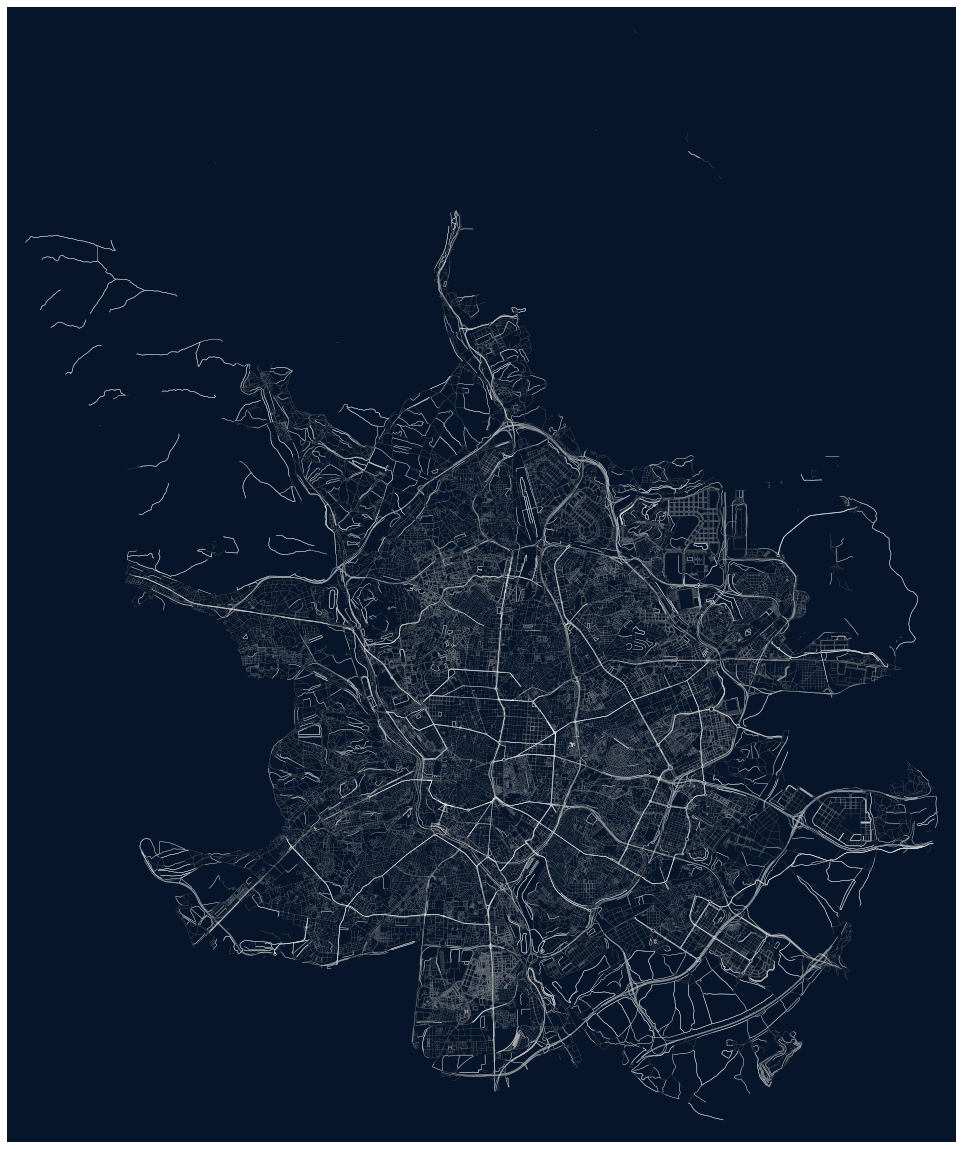

In [6]:
#Center of the map  
latitude = 40.420147592209794
longitude = -3.6889005528252254

#Limit borders 
north = latitude + 0.15
south = latitude - 0.15
east = longitude + 0.15
west = longitude - 0.15

bgcolor = "#061529"

fig, ax = ox.plot_graph(M, node_size=0, figsize=(17, 30), 
                        dpi = 300,bgcolor = bgcolor,
                        save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)

fig.tight_layout(pad=0)
fig.savefig("madridPoster.png", dpi=300, format="png", bbox_inches='tight',
            facecolor=fig.get_facecolor(), transparent=False)

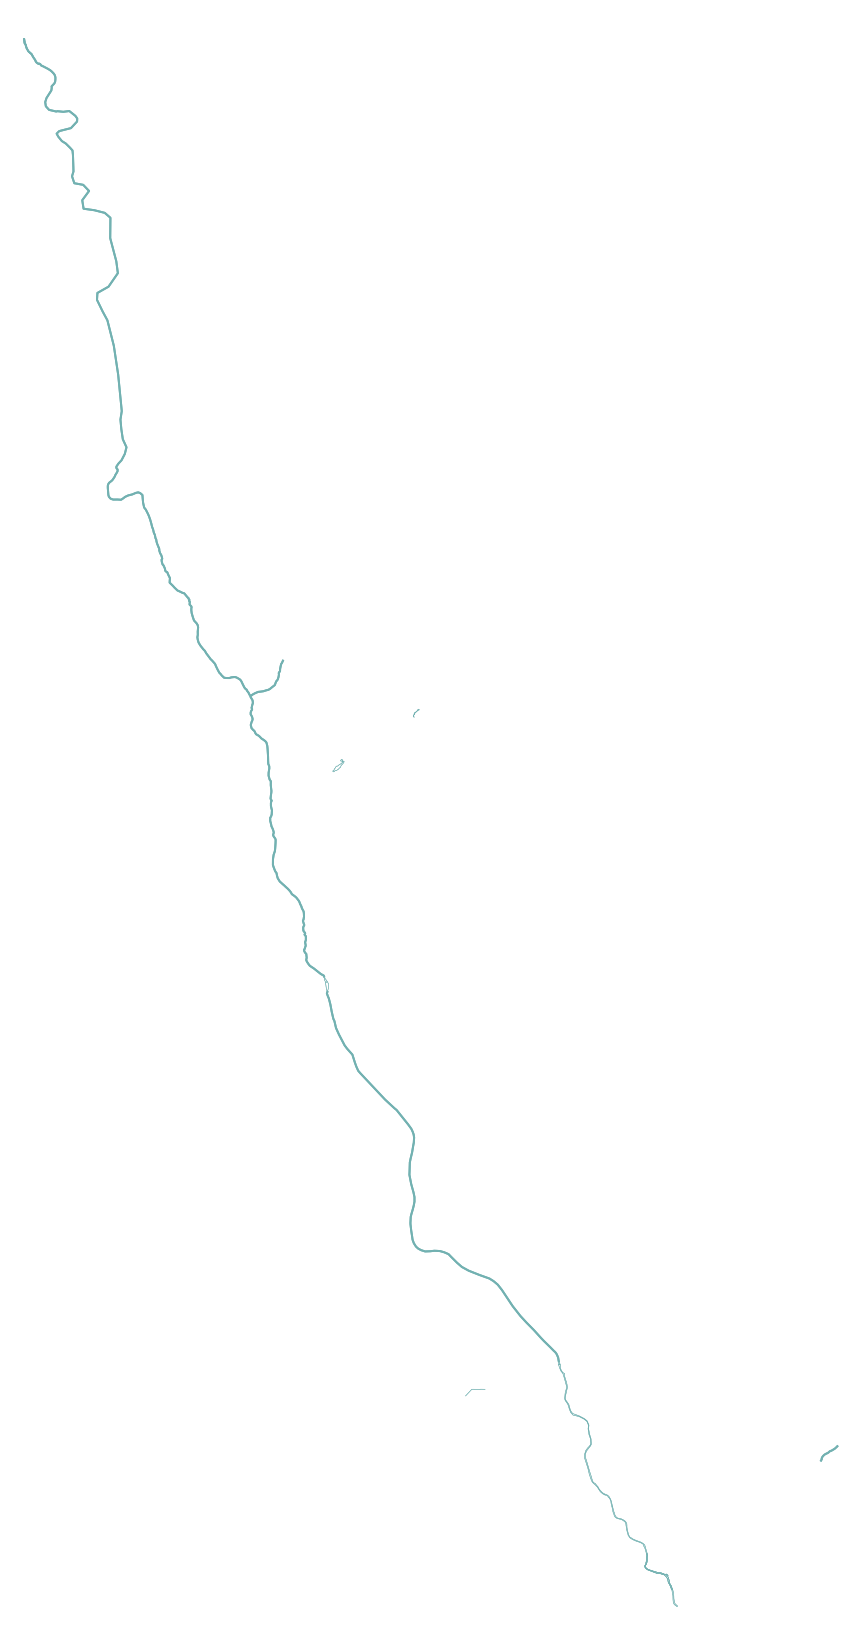

In [7]:
# Now the river
fig, ax = ox.plot_graph(Gwater, node_size=0,figsize=(17, 30), 
                        dpi = 300, bgcolor = "#80000000", save = False, edge_color=roadColors_water,
                        edge_linewidth=roadWidths_water, edge_alpha=1)

fig.tight_layout(pad=0)
fig.savefig("water.png", dpi=300, format="png", bbox_inches='tight',
            facecolor=fig.get_facecolor(), transparent=True)

In [8]:
from PIL import Image

In [9]:
background = Image.open("madridPoster.png")
foreground = Image.open("water.png")

background.paste(foreground, (0, 0), foreground)
background.show()